# 1.1

In [1]:
import pandas as pd

# ff means fossel fuel carbon emission
ff = pd.read_csv('global.1751_2020.csv')

# select data of 1987-2004
ff.loc[(ff['Year']>=1987) & (ff['Year']<=2004)]

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from solid fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from gas fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
236,1987,5725,2339,2306,892,143,44,1.146098
237,1988,5936,2387,2412,935,152,50,1.166944
238,1989,6066,2428,2459,982,156,41,1.171506
239,1990,6058,2359,2497,1025,135,42,1.149652
240,1991,6127,2284,2607,1052,138,47,1.142615
241,1992,6045,2278,2502,1083,144,38,1.109143
242,1993,6096,2274,2519,1114,150,39,1.101340
243,1994,6142,2292,2536,1115,159,40,1.093029
244,1995,6275,2354,2568,1145,168,40,1.100500
245,1996,6436,2412,2622,1188,173,41,1.112664


In [2]:
# initial carbon contents in PgC
atmC = 740
atmC_copy = 740
oceC = 900

list_atmCO2 = []
list_year = []

for i in range(18):
    
    # select each year
    index = ff.iloc[236+i]
    
    # calculate γ and transfer its unit to PgC
    # γ is carbon emissions from fossil fuel comsumption
    gamma = (index['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - index['Carbon emissions from cement production']) / 1000
    
    # calculate carbon contents each year in the atmosphere and the surface of the ocean respectively
    atmC = atmC - 105/740 * atmC + 102/900 * oceC + gamma
    oceC = oceC + 105/740 * atmC_copy - 102/900 * oceC
    atmC_copy = atmC
    
    # calculate atmospheric CO2 level in ppm each year
    atmCO2 = atmC / 2.13
    year = 1987 + i
    
    list_atmCO2.append(atmCO2)
    list_year.append(year)
    i += 1

# create a pandas series
series_atmCO2_withoutBufferEffect = pd.Series(list_atmCO2, index=list_year)
series_atmCO2_withoutBufferEffect

1987    348.630047
1988    349.924711
1989    351.255856
1990    352.567821
1991    353.891078
1992    355.153956
1993    356.429623
1994    357.713454
1995    359.046179
1996    360.436941
1997    361.834626
1998    363.213484
1999    364.641389
2000    366.121565
2001    367.596334
2002    369.123826
2003    370.802330
2004    372.556663
dtype: float64

# 1.2

In [3]:
# initial carbon contents in PgC
# Here I use N1, N2, N2_0 in the article to represent carbon contents
N1 = 740
N1_copy = 740
N2 = 900
N2_0 = 821
# ξ
xi = 3.69 + 1.86 * 0.01 * (740 / 2.13) - 1.8 * 0.000001 * (740 / 2.13) * (740 / 2.13)

list_atmCO2 = []
list_year = []

for i in range(18):
    
    # select each year
    index = ff.iloc[236+i]
    
    # calculate γ and transfer its unit to PgC
    # γ is carbon emissions from fossil fuel comsumption
    gamma = (index['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - index['Carbon emissions from cement production']) / 1000
    
    # calculate atmospheric CO2 level in ppm each year
    N1 = N1 - 105/740 * N1 + 102/900 * (N2_0 + xi*(N2-N2_0)) + gamma
    atmCO2 = N1 / 2.13
    
    xi = 3.69 + 1.86 * 0.01 * atmCO2 - 1.8 * 0.000001 * atmCO2 * atmCO2
    N2 = N2 + 105/740 * N1_copy - 102/900 * (N2_0 + xi*(N2-N2_0))
    N1_copy = N1
    year = 1987 + i
    
    list_atmCO2.append(atmCO2)
    list_year.append(year)
    i += 1

# create a pandas series
series_atmCO2_withBufferEffect = pd.Series(list_atmCO2, index=list_year)
series_atmCO2_withBufferEffect

1987    386.186604
1988    375.535973
1989    382.234874
1990    383.274132
1991    386.277107
1992    388.572018
1993    391.127948
1994    393.614240
1995    396.188448
1996    398.817574
1997    401.472430
1998    404.126639
1999    406.846784
2000    409.630682
2001    412.428679
2002    415.301866
2003    418.342870
2004    421.484025
dtype: float64

# 1.3

In [4]:
# load observed values at Mauna Loa
observation = pd.read_csv('Mauna Loa CO2 annual mean data.csv')
observation_slice = observation.loc[(observation['year']>=1987) & (observation['year']<=2004)]
observation_slice

,year,mean,unc
28,1987,349.31,0.12
29,1988,351.69,0.12
30,1989,353.20,0.12
31,1990,354.45,0.12
32,1991,355.70,0.12
33,1992,356.54,0.12
34,1993,357.21,0.12
35,1994,358.96,0.12
36,1995,360.97,0.12
37,1996,362.74,0.12


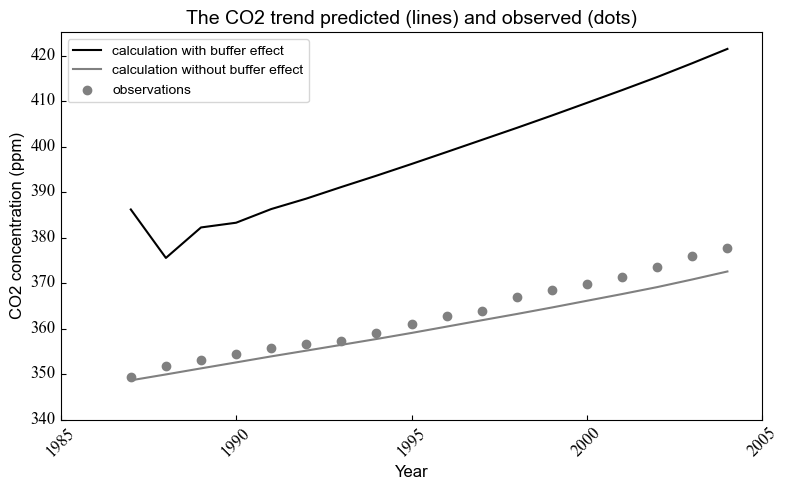

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Set the font
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

# Set the figure
plt.figure(figsize=(8,5), dpi=100)

# Plot lines and dots
plt.plot(series_atmCO2_withBufferEffect, 'k-', label='calculation with buffer effect')
plt.plot(series_atmCO2_withoutBufferEffect, color='gray', linestyle='-', label='calculation without buffer effect')
plt.scatter(observation_slice['year'], observation_slice['mean'], color='gray', marker='o', label='observations')

# Adjust xy axis ticks
plt.xticks(ticks=np.arange(1985, 2010, 5), fontsize=12, rotation=45, ha='center', va='top')
plt.yticks(ticks=np.arange(340, 430, 10), fontsize=12, rotation=0, ha='right', va='center')

# Tick parameters
plt.tick_params(axis='both', bottom=True, top=False, left=True, right=False, 
                direction='in', which='major')

# x and y labels
plt.xlabel('Year', fontproperties='Arial', fontsize=12)
plt.ylabel('CO2 concentration (ppm)', fontproperties='Arial', fontsize=12)

# Add title and legend
plt.title('The CO2 trend predicted (lines) and observed (dots)', fontproperties='Arial', fontsize=14)
plt.legend(loc='best', prop={'family':'Arial', 'size':10})

# Show plot
plt.tight_layout()
plt.show()


# Bonus

In [1]:
import pandas as pd
# fossel fuel carbon emission
ff = pd.read_csv('global.1751_2020.csv')
ff

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from solid fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from gas fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,1751,3,3,0,0,0,0,NaN
1,1752,3,3,0,0,0,0,NaN
2,1753,3,3,0,0,0,0,NaN
3,1754,3,3,0,0,0,0,NaN
4,1755,3,3,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
265,2016,9723,3919,3410,1933,387,74,1.301611
266,2017,9853,3965,3436,1987,386,80,1.303802
267,2018,10105,4082,3465,2071,408,79,1.322129
268,2019,10183,4075,3462,2148,413,86,1.318251


In [35]:
# β=0.38

import numpy as np

# dataset where delta comes from
delta_data = pd.read_csv('Global_land-use_flux-1850_2005.csv')

list_atmCO2 = []
list_year = []

N1 = 615
N1_copy = 615
N2 = 842
N2_copy = 842
N2_0 = 821
N3 = 9744
N3_copy = 9744
N4 = 26280
N4_copy = 26280
N5 = 90000000
N6 = 731
N6_copy = 731
N7 = 1328

k12 = 60/615
k21 = 60/842
k23 = 9/842
k24 = 43/842
k32 = 52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328

xi = 3.69 + 1.86 * 0.01 * 289 - 1.8 * 0.000001 * 289 * 289
f = 62 * (1 + 0.38 * np.log((N1/2.13)/289))
delta = 0.2

for i in range(100):
    
    index = ff.iloc[i]
    gamma = (index['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - index['Carbon emissions from cement production']) / 1000
    
    N1 = N1 - k12 * N1 + k21 * (N2_0 + xi*(N2-N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
    N2 = N2 + k12 * N1_copy - k21 * (N2_0 + xi*(N2-N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
    N3 = N3 + k23 * N2_copy - k32 * N3 - k34 * N3 + k43 * N4
    N4 = N4 + k34 * N3_copy - k43 * N4 + k24 * N2_copy - k45 * N4
    N5 = N5 + k45 * N4_copy - k51 * N5
    N6 = N6 + f - k67 * N6 - 2 * delta
    N7 = N7 + k67 * N6_copy - k71 * N7 + delta
    
    N1_copy = N1
    N2_copy = N2
    N3_copy = N3
    N4_copy = N4
    N6_copy = N6
    
    atmCO2 = N1 / 2.13
    year = 1751 + i
    xi = 3.69 + 1.86 * 0.01 * atmCO2 - 1.8 * 0.000001 * atmCO2 * atmCO2
    
    '''The trend before 1850 is obtained by linearly interpolating 
    from 0.2 PgC/year in 1750 to 0.5 PgC/year in 1850.'''
    delta = delta + 0.003
    
    list_atmCO2.append(atmCO2)
    list_year.append(year)
    i += 1
    
for i in range(100, 250):
    
    index = ff.iloc[i]
    gamma = (index['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - index['Carbon emissions from cement production']) / 1000
    
    N1 = N1 - k12 * N1 + k21 * (N2_0 + xi*(N2-N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
    N2 = N2 + k12 * N1_copy - k21 * (N2_0 + xi*(N2-N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
    N3 = N3 + k23 * N2_copy - k32 * N3 - k34 * N3 + k43 * N4
    N4 = N4 + k34 * N3_copy - k43 * N4 + k24 * N2_copy - k45 * N4
    N5 = N5 + k45 * N4_copy - k51 * N5
    N6 = N6 + f - k67 * N6 - 2 * delta
    N7 = N7 + k67 * N6_copy - k71 * N7 + delta
    
    N1_copy = N1
    N2_copy = N2
    N3_copy = N3
    N4_copy = N4
    N6_copy = N6
    
    atmCO2 = N1 / 2.13
    year = 1751 + i    
    xi = 3.69 + 1.86 * 0.01 * atmCO2 - 1.8 * 0.000001 * atmCO2 * atmCO2
    
    '''CO2 emission to the atmosphere by changes in land-use 
    was estimated by Houghton et al. and data from 1850 to 2000 are available.'''
    index2 = delta_data.iloc[i-99]
    delta = index2['Global'] / 1000    # The unit in the dataset is TgC, so we should transfer it to PgC.
    
    list_atmCO2.append(atmCO2)
    list_year.append(year)
    i += 1
    
series_atmCO2_sevenbox1 = pd.Series(list_atmCO2, index=list_year)
series_atmCO2_sevenbox1

1751    294.492591
1752    296.193516
1753    297.000131
1754    297.617667
1755    298.194594
           ...    
1996    454.716146
1997    457.125001
1998    459.499068
1999    461.920094
2000    464.375394
Length: 250, dtype: float64

In [36]:
# β=0.50

import numpy as np

# dataset where delta comes from
delta_data = pd.read_csv('Global_land-use_flux-1850_2005.csv')

list_atmCO2 = []
list_year = []

N1 = 615
N1_copy = 615
N2 = 842
N2_copy = 842
N2_0 = 821
N3 = 9744
N3_copy = 9744
N4 = 26280
N4_copy = 26280
N5 = 90000000
N6 = 731
N6_copy = 731
N7 = 1328

k12 = 60/615
k21 = 60/842
k23 = 9/842
k24 = 43/842
k32 = 52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328

xi = 3.69 + 1.86 * 0.01 * 289 - 1.8 * 0.000001 * 289 * 289
f = 62 * (1 + 0.50 * np.log((N1/2.13)/289))
delta = 0.2

for i in range(100):
    
    index = ff.iloc[i]
    gamma = (index['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - index['Carbon emissions from cement production']) / 1000
    
    N1 = N1 - k12 * N1 + k21 * (N2_0 + xi*(N2-N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
    N2 = N2 + k12 * N1_copy - k21 * (N2_0 + xi*(N2-N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
    N3 = N3 + k23 * N2_copy - k32 * N3 - k34 * N3 + k43 * N4
    N4 = N4 + k34 * N3_copy - k43 * N4 + k24 * N2_copy - k45 * N4
    N5 = N5 + k45 * N4_copy - k51 * N5
    N6 = N6 + f - k67 * N6 - 2 * delta
    N7 = N7 + k67 * N6_copy - k71 * N7 + delta
    
    N1_copy = N1
    N2_copy = N2
    N3_copy = N3
    N4_copy = N4
    N6_copy = N6
    
    atmCO2 = N1 / 2.13
    year = 1751 + i
    xi = 3.69 + 1.86 * 0.01 * atmCO2 - 1.8 * 0.000001 * atmCO2 * atmCO2
    
    '''The trend before 1850 is obtained by linearly interpolating 
    from 0.2 PgC/year in 1750 to 0.5 PgC/year in 1850.'''
    delta = delta + 0.003
    
    list_atmCO2.append(atmCO2)
    list_year.append(year)
    i += 1
    
for i in range(100, 250):
    
    index = ff.iloc[i]
    gamma = (index['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'] - index['Carbon emissions from cement production']) / 1000
    
    N1 = N1 - k12 * N1 + k21 * (N2_0 + xi*(N2-N2_0)) + gamma - f + delta + k51 * N5 + k71 * N7
    N2 = N2 + k12 * N1_copy - k21 * (N2_0 + xi*(N2-N2_0)) - k23 * N2 + k32 * N3 - k24 * N2
    N3 = N3 + k23 * N2_copy - k32 * N3 - k34 * N3 + k43 * N4
    N4 = N4 + k34 * N3_copy - k43 * N4 + k24 * N2_copy - k45 * N4
    N5 = N5 + k45 * N4_copy - k51 * N5
    N6 = N6 + f - k67 * N6 - 2 * delta
    N7 = N7 + k67 * N6_copy - k71 * N7 + delta
    
    N1_copy = N1
    N2_copy = N2
    N3_copy = N3
    N4_copy = N4
    N6_copy = N6
    
    atmCO2 = N1 / 2.13
    year = 1751 + i    
    xi = 3.69 + 1.86 * 0.01 * atmCO2 - 1.8 * 0.000001 * atmCO2 * atmCO2
    
    '''CO2 emission to the atmosphere by changes in land-use 
    was estimated by Houghton et al. and data from 1850 to 2000 are available.'''
    index2 = delta_data.iloc[i-99]
    delta = index2['Global'] / 1000    # The unit in the dataset is TgC, so we should transfer it to PgC.
    
    list_atmCO2.append(atmCO2)
    list_year.append(year)
    i += 1
    
series_atmCO2_sevenbox2 = pd.Series(list_atmCO2, index=list_year)
series_atmCO2_sevenbox2

1751    294.495827
1752    296.199689
1753    297.009141
1754    297.629461
1755    298.209119
           ...    
1996    454.749429
1997    457.158229
1998    459.532241
1999    461.953214
2000    464.408462
Length: 250, dtype: float64

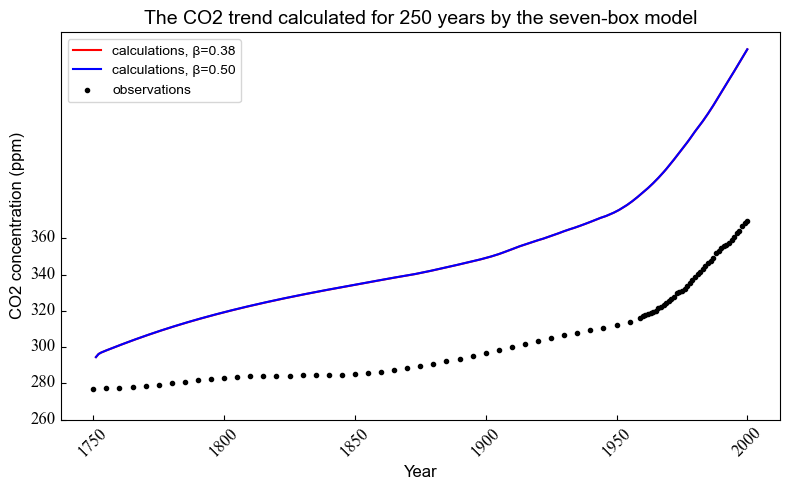

In [37]:
# load history CO2 concentration data
LawDomeData = pd.read_csv('Historical CO2 record from the Law Dome DE08, DE08-2, and DSS ice cores.csv')
before1959 = LawDomeData.loc[(LawDomeData['Year']>=1750) & (LawDomeData['Year']<=1955)]
MaunaLoaData = pd.read_csv('Mauna Loa CO2 annual mean data.csv')
after1959 = MaunaLoaData.loc[(MaunaLoaData['year']>=1959) & (MaunaLoaData['year']<=2000)]

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Set the font
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

# Set the figure
plt.figure(figsize=(8,5), dpi=100)

# Plot lines and dots
plt.plot(series_atmCO2_sevenbox1, 'r-', label='calculations, β=0.38')
plt.plot(series_atmCO2_sevenbox2, 'b-', label='calculations, β=0.50')
plt.scatter(before1959['Year'], before1959['75 Year Smoothed CO2'], color='black', marker='.', label='observations')
plt.scatter(after1959['year'], after1959['mean'], color='black', marker='.')

# Adjust xy axis ticks
plt.xticks(ticks=np.arange(1750, 2005, 50), fontsize=12, rotation=45, ha='center', va='top')
plt.yticks(ticks=np.arange(260, 380, 20), fontsize=12, rotation=0, ha='right', va='center')

# Tick parameters
plt.tick_params(axis='both', bottom=True, top=False, left=True, right=False, 
                direction='in', which='major')

# x and y labels
plt.xlabel('Year', fontproperties='Arial', fontsize=12)
plt.ylabel('CO2 concentration (ppm)', fontproperties='Arial', fontsize=12)

# Add title and legend
plt.title('The CO2 trend calculated for 250 years by the seven-box model', fontproperties='Arial', fontsize=14)
plt.legend(loc='best', prop={'family':'Arial', 'size':10})

# Show plot
plt.tight_layout()
plt.show()


In [38]:
index2

Year             2000.0
Global           1409.9
USA               -31.9
Canada             17.6
S+C America       649.6
Europe            -18.1
Nafrica/Meast      23.2
Trop.Africa       260.9
Frmr USSR          20.1
China             -12.9
S+SE Asia         497.5
Pac.Dev.Reg         3.9
Unnamed: 12         NaN
Name: 150, dtype: float64